Here, we are using Logistic Regression as the base model for RandomizedSearchCV. We have defined a hyperparameter grid to search over that includes the regularization parameter (C), penalty function (penalty), and solver method (solver).

The range of values for C is chosen as a logarithmic range from 0.0001 to 10000. The penalty function is chosen as L1 and L2, and the solver method is chosen as liblinear and saga.

We have set the number of iterations (n_iter) to 50 and the number of cross-validation folds (cv) to 5, which determines how many times the data will be split into training and validation sets during the search.

Finally, we fit the RandomizedSearchCV object to the training data, predict on the test set, and report the train and test accuracy, classification report, and best hyperparameters found during the search.

Note that the hyperparameters and their ranges were chosen based on empirical evidence and prior knowledge about the Logistic Regression classifier. The choice of hyperparameters and their ranges may vary depending on the specific problem and dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [4]:
# Shuffle the DataFrame
df_shuff = df[0:50_000]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph'].values

In [7]:
X

array([[1.01453973, 1.03422478, 1.00536735, 1.01012954],
       [0.99648304, 1.00676816, 0.99611219, 0.99663242],
       [0.97689244, 0.99996001, 0.97513185, 0.97689621],
       ...,
       [0.94227888, 0.97475218, 0.94160997, 0.94282857],
       [1.00002718, 1.0221754 , 0.99267274, 0.99691892],
       [0.98602115, 0.99246708, 0.98594222, 0.98612915]])

In [8]:
np.count_nonzero(df.ph.values>1)

0

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error and R2 score for the training and testing data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Linear Regression train r2: {:.3f}".format(r2_train))
print("Linear Regression test r2: {:.3f}".format(r2_test))
print("Linear Regression train RMSE: {:.3f}".format(rmse_train))
print("Linear Regression test RMSE: {:.3f}".format(rmse_test))


Linear Regression train r2: 0.939
Linear Regression test r2: 0.939
Linear Regression train RMSE: 0.071
Linear Regression test RMSE: 0.072


In [10]:
np.count_nonzero(y_train>1)

0

In [11]:
y_test.shape

(15000,)

In [12]:
np.count_nonzero(y_pred_train>1)

2184

In [13]:
np.count_nonzero(y_test>1)

0

In [14]:
np.count_nonzero(y_pred_test>1)

919

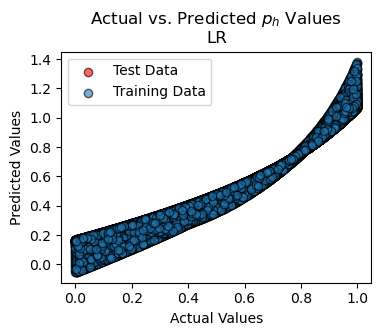

In [15]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Test Data')
plt.scatter(y_train, y_pred_train, edgecolors='k', alpha=0.6, label='Training Data')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted $p_h$ Values\nLR')
plt.legend()
plt.show()


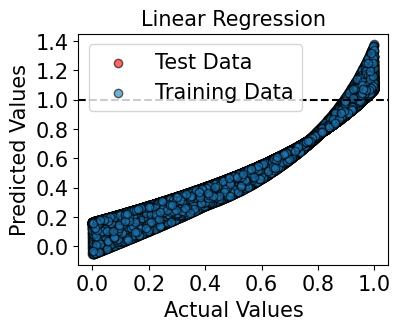

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Test Data')
plt.scatter(y_train, y_pred_train, edgecolors='k', alpha=0.6, label='Training Data')

plt.xlabel('Actual Values',fontsize=15)
plt.ylabel('Predicted Values',fontsize=15)
plt.title('Linear Regression',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',fontsize=15)

plt.axhline(y=1, color='k', linestyle='--', linewidth=1.5)

plt.show()


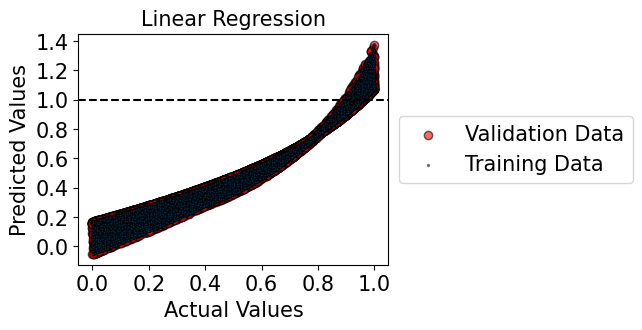

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Validation Data')
plt.scatter(y_train, y_pred_train, edgecolors='k',s=2, alpha=0.5, label='Training Data')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Linear Regression', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axhline(y=1, color='k', linestyle='--', linewidth=1.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

# plt.tight_layout()  # Ensures the legend is not cut off
plt.show()


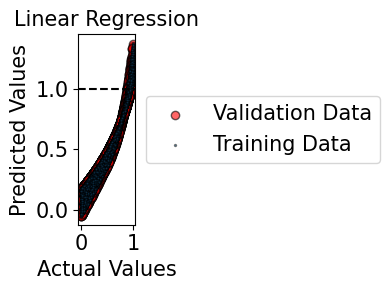

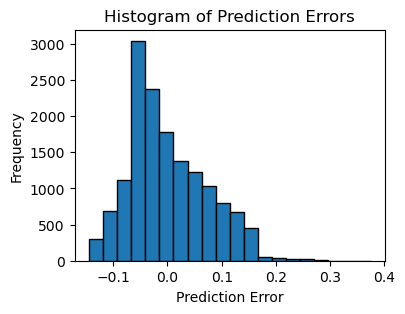

In [22]:
import matplotlib.pyplot as plt
# First plot

plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Validation Data')
plt.scatter(y_train, y_pred_train, edgecolors='k',s=2, alpha=0.5, label='Training Data')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Linear Regression', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axhline(y=1, color='k', linestyle='--', linewidth=1.5)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.tight_layout() # Ensures the legend is not cut off
# Second plot (inset)

plt.figure(figsize=(4,3))
plt.hist(y_pred_test - y_test, bins=20, edgecolor='k')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

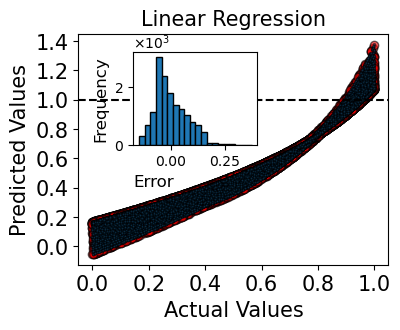

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create the main figure
fig = plt.figure(figsize=(4, 3))

# Create the main plot
ax_main = fig.add_subplot(111)
ax_main.scatter(y_test, y_pred_test, color='r', edgecolors='k', alpha=0.6, label='Validation Data')
ax_main.scatter(y_train, y_pred_train, edgecolors='k',s=2, alpha=0.5, label='Training Data')

plt.axhline(y=1, color='k', linestyle='--', linewidth=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_main.set_xlabel('Actual Values', fontsize=15)
ax_main.set_ylabel('Predicted Values', fontsize=15)
plt.title('Linear Regression', fontsize=15)
# Specify the exact coordinates for the inset location
inset_pos = [0.2, 0.55, 0.4, 0.4]  # [left, bottom, width, height]

# Create the inset axes at the specified coordinates
ax_inset = inset_axes(ax_main, width="100%", height="100%", bbox_to_anchor=inset_pos, bbox_transform=ax_main.transAxes)
ax_inset.hist(y_pred_test - y_test, bins=20, edgecolor='k')
ax_inset.set_xlabel('Error',fontsize=12,loc='left')
ax_inset.set_ylabel('Frequency',fontsize=12)

# Set y-axis tick formatter in the inset axes to use exponent form
ax_inset.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax_inset.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))

plt.show()

In [39]:
ax_inset.set_xlabel?

In [19]:
y_pred_test

array([0.51342563, 0.42442473, 0.19130678, ..., 0.31146547, 0.93081233,
       0.21348877])

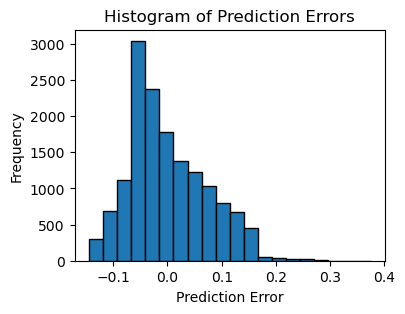

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.hist(y_pred_test - y_test, bins=20, edgecolor='k')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()


In [10]:
import pickle

# Train your machine learning model and save it to a variable named 'model'

# Save the model to a file named 'model.pkl'
with open('Linear_regression_4_1', 'wb') as file:
    pickle.dump(model, file)